## ML Algorithms

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)


In [3]:
df= pd.read_csv('heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Removing outliers of BM </b></p>
</div>. 

In [4]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0, ['BMI'])
len(outliers_indices)
df.drop(index = outliers_indices, inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [5]:
df.drop_duplicates(inplace= True)

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Standrization </b></p>
</div>. 

In [6]:
num_cols= ['BMI','PhysicalHealth', 'MentalHealth','SleepTime']

In [7]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-2.105962,Yes,No,No,-0.054926,3.234214,No,Female,55-59,White,Yes,Yes,Very good,-1.438724,Yes,No,Yes
1,No,-1.399702,No,No,Yes,-0.430475,-0.501181,No,Female,80 or older,White,No,Yes,Very good,-0.063812,No,No,No
2,No,-0.221343,Yes,No,No,2.073187,3.234214,No,Male,65-69,White,Yes,Yes,Fair,0.623644,Yes,No,No
3,No,-0.668893,No,No,No,-0.430475,-0.501181,No,Female,75-79,White,No,No,Good,-0.751268,No,No,Yes
4,No,-0.763313,No,No,No,3.074651,-0.501181,Yes,Female,40-44,White,No,Yes,Very good,0.623644,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,-1.044684,No,No,No,-0.430475,-0.501181,No,Female,18-24,Hispanic,No,Yes,Excellent,0.623644,No,No,No
319790,Yes,-0.064606,Yes,No,No,0.445806,-0.501181,Yes,Male,60-64,Hispanic,Yes,No,Fair,-0.751268,Yes,No,No
319791,No,0.394274,Yes,No,No,-0.430475,-0.501181,No,Male,35-39,Hispanic,No,Yes,Very good,-1.438724,Yes,No,No
319792,No,-0.663228,No,No,No,-0.430475,-0.501181,No,Female,45-49,Hispanic,No,Yes,Good,-0.751268,No,No,No


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Encoding  </b></p>
</div>. 

 ###  <span style='color:#0000FF'> **Label Encoding**  </span>


In [9]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}
mapping_yes_no={'Yes':1,'No':0}
Yes_No_Columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                'KidneyDisease', 'SkinCancer']

In [10]:
df['GenHealth']=df['GenHealth'].map(mapping_Genhealth)
df['AgeCategory']=df['AgeCategory'].map(mapping_AgeCategory)
df['HeartDisease']=df['HeartDisease'].map(mapping_yes_no)
df[Yes_No_Columns]=df[Yes_No_Columns].replace(mapping_yes_no)

In [11]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.105962,1,0,0,-0.054926,3.234214,0,Female,7,White,Yes,1,3,-1.438724,1,0,1
1,0,-1.399702,0,0,1,-0.430475,-0.501181,0,Female,12,White,No,1,3,-0.063812,0,0,0
2,0,-0.221343,1,0,0,2.073187,3.234214,0,Male,9,White,Yes,1,1,0.623644,1,0,0
3,0,-0.668893,0,0,0,-0.430475,-0.501181,0,Female,11,White,No,0,2,-0.751268,0,0,1
4,0,-0.763313,0,0,0,3.074651,-0.501181,1,Female,4,White,No,1,3,0.623644,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,-1.044684,0,0,0,-0.430475,-0.501181,0,Female,0,Hispanic,No,1,4,0.623644,0,0,0
319790,1,-0.064606,1,0,0,0.445806,-0.501181,1,Male,8,Hispanic,Yes,0,1,-0.751268,1,0,0
319791,0,0.394274,1,0,0,-0.430475,-0.501181,0,Male,3,Hispanic,No,1,3,-1.438724,1,0,0
319792,0,-0.663228,0,0,0,-0.430475,-0.501181,0,Female,5,Hispanic,No,1,2,-0.751268,0,0,0


 ###  <span style='color:#0000FF'> **OneHot Encoding**  </span>


In [12]:
cols =['Sex','Race', 'Diabetic']
df=pd.get_dummies(df,columns=cols,drop_first=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,SkinCancer,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,-2.105962,1,0,0,-0.054926,3.234214,0,7,1,...,1,0,0,0,0,0,1,0,1,0
1,0,-1.399702,0,0,1,-0.430475,-0.501181,0,12,1,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.221343,1,0,0,2.073187,3.234214,0,9,1,...,0,1,0,0,0,0,1,0,1,0
3,0,-0.668893,0,0,0,-0.430475,-0.501181,0,11,0,...,1,0,0,0,0,0,1,0,0,0
4,0,-0.763313,0,0,0,3.074651,-0.501181,1,4,1,...,0,0,0,0,0,0,1,0,0,0


# <b><span style='color:#0000FF'></span> Split Dataset for Training and Testing </b>

In [13]:
features = df.drop(columns =['HeartDisease'], axis = 1)
target = df['HeartDisease']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

In [15]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (233062, 23)
Shape of testing feature: (58266, 23)
Shape of training label: (233062,)
Shape of training label: (58266,)


## Modeling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [16]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [17]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*50)

Training Model LR 
--------------


C:\Users\ascom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy: 0.9111913925749773
Testing Accuracy: 0.9107947766140793
Testing Confusion Matrix: 
[[54360   445]
 [ 4938   601]]
Testing Recall: 0.10850333995306012
Testing Precesion: 0.5745697896749522
Testing F-1: 0.18253606681852697
Testing F-Beta: 0.3090609894065618
--------------------------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9210433644193841
Testing Accuracy: 0.9011003579477661
Testing Confusion Matrix: 
[[53762  1043]
 [ 4925   614]]
Testing Recall: 0.11085033399530601
Testing Precesion: 0.37054918527459263
Testing F-1: 0.1706503613118399
Testing F-Beta: 0.25232185419577546
--------------------------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9970750663910214
Testing Accuracy: 0.8535562773432321
Testing Confusion Matrix: 
[[50132  4673]
 [ 4164  1375]]
Testing Recall: 0.2482397544683156
Testing Precesion: 0.2273478835978836
Testing F-1: 0.23733494433416763
Testing F-Beta: 0.23124011974033837
---

C:\Users\ascom\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.9168962560021212
Testing Accuracy: 0.9098833355428875
Testing Confusion Matrix: 
[[54378   427]
 [ 5011   528]]
Testing Recall: 0.09532406571583318
Testing Precesion: 0.5528795811518324
Testing F-1: 0.16261164151524485
Testing F-Beta: 0.28208141895501654
--------------------------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.8179829558401313
Testing Accuracy: 0.8200649608908922
Testing Confusion Matrix: 
[[46581  8224]
 [ 2634  2905]]
Testing Recall: 0.5244628994403322
Testing Precesion: 0.26102974211519453
Testing F-1: 0.3485721142308615
Testing F-Beta: 0.29018080111876937
---------------------------------------------

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Separate Models  </b></p>
</div>. 

**Here I take different machine learning algorithm and try to find algorithm which predict accurately.**

1. Logistic Regression
2. K-Nearest Neighbour
3. Naive Bayes
4. Decision Tree
5. Random Forest Classifier
6. Extreme Gradient Boost



In [18]:


def evaluate_model(model,x):
    model=model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print('_'*50)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('_'*50)
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('_'*50)
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('_'*50)
    print(classification_report(y_test,y_pred))
    print('_'*50)
    print('F1 Score: ',f1_score(y_test,y_pred))
    
    # Display confussion matrix
    plt.figure(figsize = (6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,cmap=x, fmt = '.1f') # plot_kwargs = {'percent' : True}
    plt.xlabel('Predicted')
    plt.ylabel('True')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 1. Logestic Regression  </b></p>
</div>. 

C:\Users\ascom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy: 0.9117101887051514
__________________________________________________
Accuracy Score:  0.9128994610922322
__________________________________________________
Precision Score:  0.5459770114942529
__________________________________________________
Recall Score:  0.1102301295687488
__________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53095
           1       0.55      0.11      0.18      5171

    accuracy                           0.91     58266
   macro avg       0.73      0.55      0.57     58266
weighted avg       0.89      0.91      0.89     58266

__________________________________________________
F1 Score:  0.1834271922767498


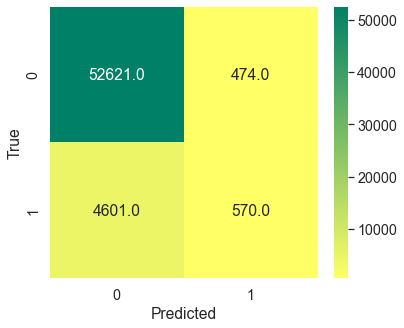

In [17]:
evaluate_model(LogisticRegression(),'summer_r')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 2. K-Nearest Neighbour  </b></p>
</div>. 

Training Accuracy: 0.9150569376389115
__________________________________________________
Accuracy Score:  0.9090378608450898
__________________________________________________
Precision Score:  0.4012251148545176
__________________________________________________
Recall Score:  0.05066718236317927
__________________________________________________
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     53095
           1       0.40      0.05      0.09      5171

    accuracy                           0.91     58266
   macro avg       0.66      0.52      0.52     58266
weighted avg       0.87      0.91      0.88     58266

__________________________________________________
F1 Score:  0.08997252747252747


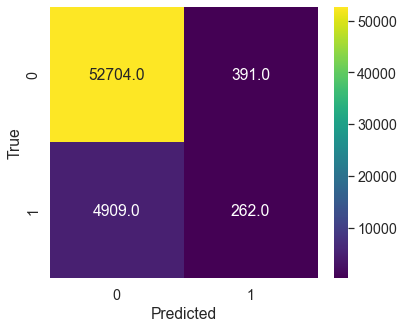

In [18]:
evaluate_model(KNeighborsClassifier(n_neighbors=8),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 3. Naive Bayes  </b></p>
</div>. 

Training Accuracy: 0.8201680239592898
__________________________________________________
Accuracy Score:  0.8181958603645351
__________________________________________________
Precision Score:  0.25142123601687144
__________________________________________________
Recall Score:  0.5302649390833495
__________________________________________________
              precision    recall  f1-score   support

           0       0.95      0.85      0.89     53095
           1       0.25      0.53      0.34      5171

    accuracy                           0.82     58266
   macro avg       0.60      0.69      0.62     58266
weighted avg       0.89      0.82      0.85     58266

__________________________________________________
F1 Score:  0.341108415749207


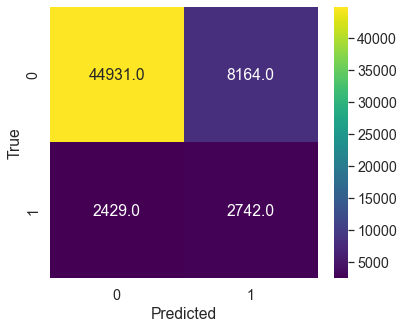

In [19]:
evaluate_model(GaussianNB(),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 5. Decision Tree  </b></p>
</div>. 

Training Accuracy: 0.912130677673752
__________________________________________________
Accuracy Score:  0.911972677032918
__________________________________________________
Precision Score:  0.5351170568561873
__________________________________________________
Recall Score:  0.061883581512280024
__________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53095
           1       0.54      0.06      0.11      5171

    accuracy                           0.91     58266
   macro avg       0.73      0.53      0.53     58266
weighted avg       0.88      0.91      0.88     58266

__________________________________________________
F1 Score:  0.1109377708441671


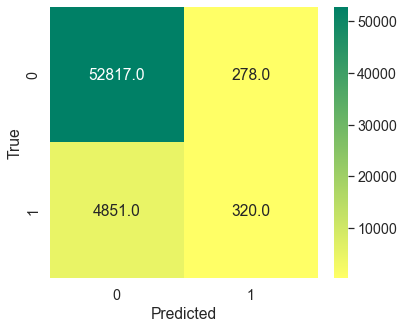

In [20]:
evaluate_model(DecisionTreeClassifier(max_depth=8,max_features=4,min_samples_split=5,min_samples_leaf=3),'summer_r')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 6. Random Forest  </b></p>
</div>. 

Training Accuracy: 0.9135165749886296
__________________________________________________
Accuracy Score:  0.912401743727045
__________________________________________________
Precision Score:  0.6283524904214559
__________________________________________________
Recall Score:  0.03171533552504351
__________________________________________________
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53095
           1       0.63      0.03      0.06      5171

    accuracy                           0.91     58266
   macro avg       0.77      0.51      0.51     58266
weighted avg       0.89      0.91      0.87     58266

__________________________________________________
F1 Score:  0.060382916053019146


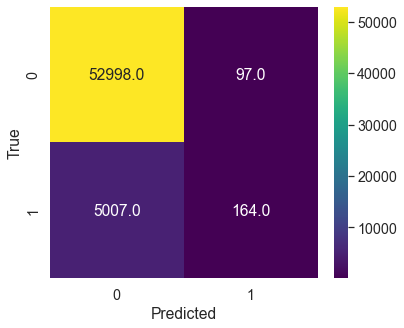

In [21]:
evaluate_model(RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 7. XGboost  </b></p>
</div>. 

C:\Users\ascom\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.9177557903047258
__________________________________________________
Accuracy Score:  0.9122987677204545
__________________________________________________
Precision Score:  0.5304087736789631
__________________________________________________
Recall Score:  0.10288145426416553
__________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53095
           1       0.53      0.10      0.17      5171

    accuracy                           0.91     58266
   macro avg       0.72      0.55      0.56     58266
weighted avg       0.88      0.91      0.88     58266

_____________

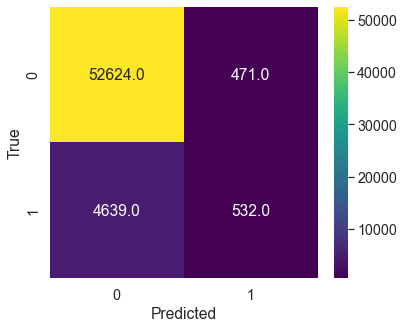

In [22]:
evaluate_model(XGBClassifier(),'viridis')